In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar la base de datos
# Asegúrate de que la ruta sea correcta si estás trabajando con un archivo CSV
df = pd.read_csv("ubereats.csv")

In [3]:
# Parte 1: Limpieza de Datos
# Ejercicio 1: Identificar valores nulos
print("Ejercicio 1: Valores nulos por columna")
print(df.isnull().sum())

Ejercicio 1: Valores nulos por columna
id_pedido           0
cliente             0
detalle_compra      0
comuna              0
valor_compra      159
repartidor          0
fecha_pedido        0
hora_entrega        0
dtype: int64


In [4]:
# Ejercicio 2: Eliminar espacios en blanco en las columnas de texto
print("\nEjercicio 2: Eliminar espacios en blanco")
df.dropna(subset=['valor_compra'], inplace=True)

# Confirmamos neuvamente la cantidad de valores nulos por columna
print(df.isnull().sum())


Ejercicio 2: Eliminar espacios en blanco
id_pedido         0
cliente           0
detalle_compra    0
comuna            0
valor_compra      0
repartidor        0
fecha_pedido      0
hora_entrega      0
dtype: int64


In [5]:
# Ejercicio 3: Convertir `valor_compra` a numérico
# Verificamos tipo de datos
print(df.dtypes)
print("\nEjercicio 3: Convertir valor_compra a numérico")
df['valor_compra'] = pd.to_numeric(df['valor_compra'], errors='coerce')

id_pedido           int64
cliente            object
detalle_compra     object
comuna             object
valor_compra      float64
repartidor         object
fecha_pedido       object
hora_entrega       object
dtype: object

Ejercicio 3: Convertir valor_compra a numérico



Ejercicio 4: Detectar valores atípicos


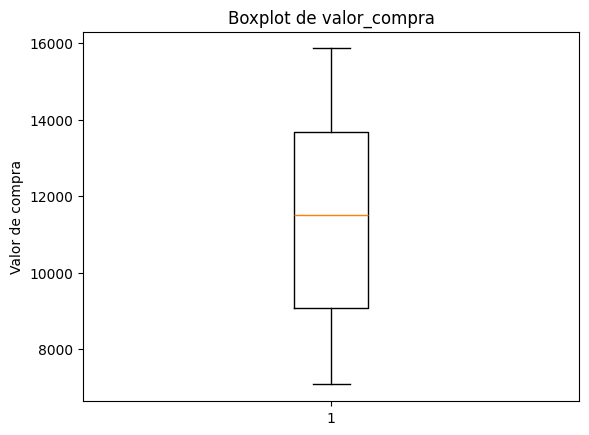

In [6]:
# Ejercicio 4: Identificar valores atípicos en `valor_compra` usando un boxplot
print("\nEjercicio 4: Detectar valores atípicos")
plt.boxplot(df['valor_compra'])
plt.title('Boxplot de valor_compra')
plt.ylabel('Valor de compra')
plt.show()

In [7]:
# Parte 2: Análisis Exploratorio
# Ejercicio 1: Calcular el valor promedio de los pedidos
print("\nEjercicio 1: Valor promedio de los pedidos")
print(f"Promedio de valor_compra: {df['valor_compra'].mean().round(0)}")


Ejercicio 1: Valor promedio de los pedidos
Promedio de valor_compra: 11386.0



Ejercicio 2: Comuna con más pedidos
comuna
Providencia    31
Macul          25
La Reina       23
Las Condes     23
Ñuñoa          22
Santiago       17
Name: count, dtype: int64

La comuna con más pedidos es: Providencia


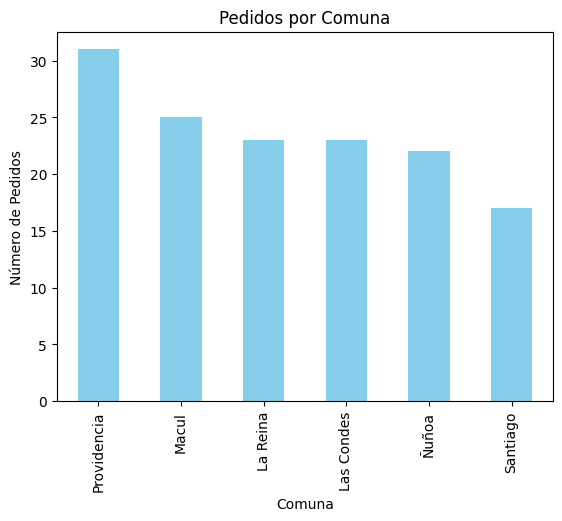

In [8]:
# Ejercicio 2: ¿Cuál es la comuna con más pedidos?
comuna_pedidos = df['comuna'].value_counts()
print("\nEjercicio 2: Comuna con más pedidos")
print(comuna_pedidos)
print(f"\nLa comuna con más pedidos es: {comuna_pedidos.idxmax()}")
# Graficar la comuna con más pedidos
comuna_pedidos.plot(kind='bar', color='skyblue')
plt.title('Pedidos por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Pedidos')
plt.show()

In [9]:
# Ejercicio 3: Agrupar por repartidor y contar cuántos pedidos hizo cada uno
pedidos_repartidor = df.groupby('repartidor')['id_pedido'].count()
print("\nEjercicio 3: Pedidos por repartidor")
print(pedidos_repartidor)


Ejercicio 3: Pedidos por repartidor
repartidor
Carlos     41
Daniela    50
Felipe     50
Name: id_pedido, dtype: int64



Ejercicio 4: Pedidos por fecha
fecha_pedido
2024-05-01    20
2024-05-02    16
2024-05-03    19
2024-05-04    16
2024-05-05    12
2024-05-06    17
2024-05-07    23
2024-05-08    18
Name: id_pedido, dtype: int64


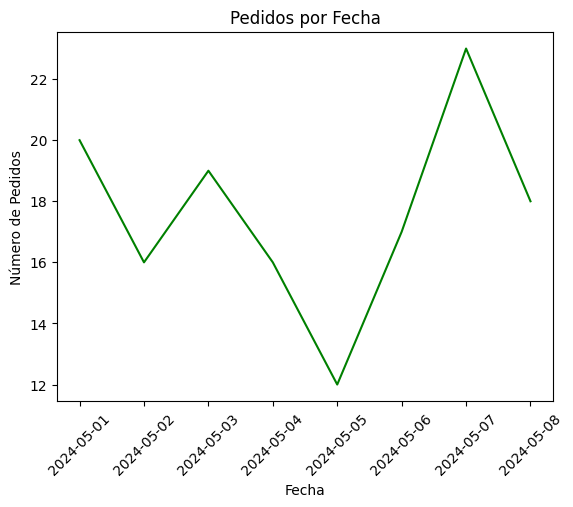

In [10]:
# Ejercicio 4: ¿En qué fechas se realizaron más pedidos?
pedidos_por_fecha = df.groupby('fecha_pedido')['id_pedido'].count()
print("\nEjercicio 4: Pedidos por fecha")
print(pedidos_por_fecha)

# Graficar los pedidos por fecha
pedidos_por_fecha.plot(kind='line', color='green')
plt.title('Pedidos por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Parte 3: Funciones Específicas

# Ejercicio 1: Función para encontrar total de pedidos por comuna
def total_pedidos_por_comuna(comuna):
    return df[df['comuna'] == comuna]['id_pedido'].count()

print("\nEjercicio 1: Total de pedidos por comuna 'Santiago'")
print(total_pedidos_por_comuna('Santiago'))


Ejercicio 1: Total de pedidos por comuna 'Santiago'
17


In [12]:
# Ejercicio 12: Función para obtener el resumen de pedidos de un cliente
def resumen_pedidos_cliente(cliente):
    cliente_data = df[df['cliente'] == cliente]
    total_pedidos = cliente_data['id_pedido'].count()
    gasto_total = cliente_data['valor_compra'].sum()
    return total_pedidos, gasto_total

print("\nEjercicio 3: Resumen de pedidos para cliente 'Ana'")
total_pedidos, gasto_total = resumen_pedidos_cliente('Ana')
print(f"Total pedidos: {total_pedidos}, Gasto total: {gasto_total}")


Ejercicio 3: Resumen de pedidos para cliente 'Ana'
Total pedidos: 12, Gasto total: 164831.0


In [13]:
# Ejercicio 4: ¿Qué repartidor ha entregado pedidos en más comunas?
repartidor_comunas = df.groupby('repartidor')['comuna'].nunique()
print("\nEjercicio 4: Repartidor que ha entregado pedidos en más comunas")
print(repartidor_comunas)


Ejercicio 4: Repartidor que ha entregado pedidos en más comunas
repartidor
Carlos     6
Daniela    6
Felipe     6
Name: comuna, dtype: int64


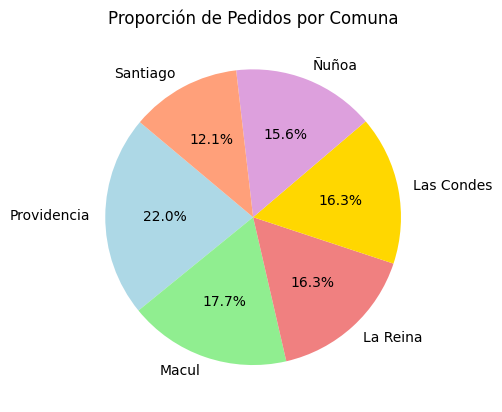

In [14]:
# Ejercicio 4: Crear gráfico de torta que muestre la proporción de pedidos por comuna
comuna_pedidos = df['comuna'].value_counts()
paleta_colores = ['lightblue', 'lightgreen', 'lightcoral', 'gold', 'plum', 'lightsalmon', 'lightgray']
plt.pie(comuna_pedidos, labels=comuna_pedidos.index, autopct='%1.1f%%', startangle=140, colors= paleta_colores)
plt.title('Proporción de Pedidos por Comuna')
plt.show()

# comuna_pedidos: los valores (cantidad de pedidos) serán el tamaño de cada "porción".
# labels=comuna_pedidos.index: los nombres de las comunas como etiquetas.
# autopct='%1.1f%%': muestra el porcentaje con un decimal (por ejemplo: "22.2%").
# startangle=140: gira el gráfico 140 grados para mejor presentación.
# colors=usa una paleta de colores previamente definida.